<a href="https://colab.research.google.com/github/JoouJoou/About-me/blob/main/Regress%C3%A3o_logistica_e_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importando bibliotecas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt


# 1.1 Importando base de dados

In [3]:
df_curso = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_IES','CO_UF','CO_MUNICIPIO','NO_CURSO','IN_AJUDA_DEFICIENTE','QT_MATRICULA_TOTAL','QT_CONCLUINTE_TOTAL'])
df_curso_2 = df_curso.fillna(0)
df_curso_2.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,NO_CURSO,IN_AJUDA_DEFICIENTE,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,DIREITO,1,447,75
1,2019,1,51.0,5103403.0,CIÊNCIAS ECONÔMICAS,0,323,28
2,2019,1,51.0,5103403.0,ENGENHARIA CIVIL,0,248,45
3,2019,1,51.0,5103403.0,PEDAGOGIA,1,331,53
4,2019,1,51.0,5103403.0,SERVIÇO SOCIAL,1,274,32


In [4]:
#df_alunos = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', sep='|', encoding='latin-1', usecols=['IN_COMPLEMENTAR_ESTAGIO', 'TP_MODALIDADE_ENSINO', 'CO_UF_NASCIMENTO', 'IN_DEFICIENCIA', 'NU_DIA_NASCIMENTO', 'NU_IDADE', 'TP_SEMESTRE_REFERENCIA', 'TP_MOBILIDADE_ACADEMICA_INTERN', 'IN_BOLSA_MONITORIA', 'IN_COMPLEMENTAR_PESQUISA', 'IN_APOIO_BOLSA_TRABALHO', 'IN_APOIO_SOCIAL', 'CO_IES_DESTINO', 'IN_BOLSA_EXTENSAO', 'IN_BOLSA_PESQUISA', 'QT_CARGA_HORARIA_INTEG', 'IN_APOIO_TRANSPORTE', 'IN_COMPLEMENTAR_MONITORIA', 'IN_ATIVIDADE_EXTRACURRICULAR', 'TP_MOBILIDADE_ACADEMICA', 'TP_SEMESTRE_CONCLUSAO', 'TP_COR_RACA', 'IN_APOIO_MATERIAL_DIDATICO', 'TP_GRAU_ACADEMICO', 'QT_CARGA_HORARIA_TOTAL', 'IN_APOIO_BOLSA_PERMANENCIA', 'IN_COMPLEMENTAR_EXTENSAO', 'IN_MATRICULA', 'TP_ESCOLA_CONCLUSAO_ENS_MEDIO', 'IN_INGRESSO_VESTIBULAR', 'TP_TURNO', 'TP_SEXO', 'IN_MOBILIDADE_ACADEMICA', 'IN_APOIO_MORADIA', 'CO_PAIS_DESTINO', 'NU_MES_NASCIMENTO', 'TP_NACIONALIDADE', 'NU_ANO_CENSO', 'NU_ANO_NASCIMENTO', 'TP_NIVEL_ACADEMICO', 'IN_BOLSA_ESTAGIO', 'IN_CONCLUINTE', 'IN_ALUNO_PARFOR', 'IN_APOIO_ALIMENTACAO', 'CO_MUNICIPIO_NASCIMENTO'])
#df_alunos.head()
#'NU_ANO_CENSO','TP_TURNO','TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO','TP_NIVEL_ACADEMICO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','NU_MES_NASCIMENTO','NU_DIA_NASCIMENTO','NU_IDADE','TP_NACIONALIDADE','CO_UF_NASCIMENTO','CO_MUNICIPIO_NASCIMENTO','IN_DEFICIENCIA','QT_CARGA_HORARIA_TOTAL','QT_CARGA_HORARIA_INTEG','IN_INGRESSO_VESTIBULAR','IN_APOIO_SOCIAL','IN_APOIO_ALIMENTACAO','IN_APOIO_BOLSA_PERMANENCIA','IN_APOIO_BOLSA_TRABALHO','IN_APOIO_MATERIAL_DIDATICO','IN_APOIO_MORADIA','IN_APOIO_TRANSPORTE','IN_ATIVIDADE_EXTRACURRICULAR','IN_COMPLEMENTAR_ESTAGIO','IN_COMPLEMENTAR_EXTENSAO','IN_COMPLEMENTAR_MONITORIA','IN_COMPLEMENTAR_PESQUISA','IN_BOLSA_ESTAGIO','IN_BOLSA_EXTENSAO','IN_BOLSA_MONITORIA','IN_BOLSA_PESQUISA','TP_ESCOLA_CONCLUSAO_ENS_MEDIO','IN_ALUNO_PARFOR','TP_SEMESTRE_CONCLUSAO','TP_SEMESTRE_REFERENCIA','IN_MOBILIDADE_ACADEMICA','TP_MOBILIDADE_ACADEMICA','TP_MOBILIDADE_ACADEMICA_INTERN','CO_IES_DESTINO','CO_PAIS_DESTINO','IN_MATRICULA','IN_CONCLUINTE'

In [16]:
df_2011 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2011.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2011['NU_ANO_CENSO'] = 2011

In [17]:
df_2012 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2012.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2012['NU_ANO_CENSO'] = 2012

In [18]:
df_2013 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2013.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2013['NU_ANO_CENSO'] = 2013

In [19]:
df_2014 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2014.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2014['NU_ANO_CENSO'] = 2014

In [20]:
df_2015 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2015.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2015['NU_ANO_CENSO'] = 2015

In [21]:
df_2016 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2016.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2016['NU_ANO_CENSO'] = 2016

In [22]:
df_2017 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2017.csv', usecols=['CO_ALUNO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2017['NU_ANO_CENSO'] = 2017

In [23]:
df_2018 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2018.csv', usecols=['ID_ALUNO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2018['NU_ANO_CENSO'] = 2018

In [24]:
df_2019 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', usecols=['ID_ALUNO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2019['NU_ANO_CENSO'] = 2019

In [25]:
df_regressao = pd.concat([df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019])
df_regressao['QNT_DE_ALUNOS'] = 'NaN'
df_alunos_anos = df_regressao.groupby('NU_ANO_CENSO').agg({'QNT_DE_ALUNOS': ['count']}).reset_index()
df_alunos_anos

,NU_ANO_CENSO,QNT_DE_ALUNOS
,,count
0,2011,29033
1,2012,34656
2,2013,37796
3,2014,45088
4,2015,51685
5,2016,49813
6,2017,52542
7,2018,59496
8,2019,66750


# 1.2 Testes regressão logistica

Text(0, 0.5, 'Concluintes')

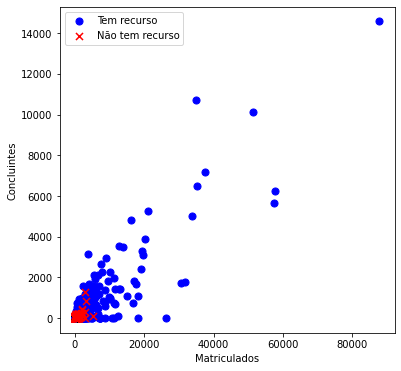

In [7]:
positive = df_curso_2[df_curso_2['IN_AJUDA_DEFICIENTE'].isin([1])]  
negative = df_curso_2[df_curso_2['IN_AJUDA_DEFICIENTE'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(positive['QT_MATRICULA_TOTAL'], positive['QT_CONCLUINTE_TOTAL'], s=50, c='b', marker='o', label='Tem recurso')  
ax.scatter(negative['QT_MATRICULA_TOTAL'], negative['QT_CONCLUINTE_TOTAL'], s=50, c='r', marker='x', label='Não tem recurso')  
ax.legend()  
ax.set_xlabel('Matriculados')  
ax.set_ylabel('Concluintes') 

In [8]:
X = df_curso_2['IN_AJUDA_DEFICIENTE'].values
X = X.reshape(-1, 1)
y = df_curso_2['QT_CONCLUINTE_TOTAL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [10]:
#logit = LogisticRegression()

In [11]:
#logit.fit(X_train, y_train)

In [12]:
X = df_curso_2[['QT_CONCLUINTE_TOTAL', 'QT_MATRICULA_TOTAL']].values
#X = X.reshape(-1, 1)
y = df_curso_2['IN_AJUDA_DEFICIENTE'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [13]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

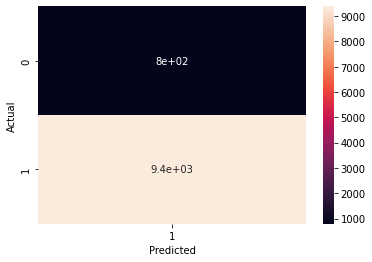

In [14]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [15]:
#Não faz o menor sentido aplicar regressão logistica com esses dados
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.921792100609157


# Testando regressão polinomial


Text(0, 0.5, 'QNT_DE_ALUNOS')

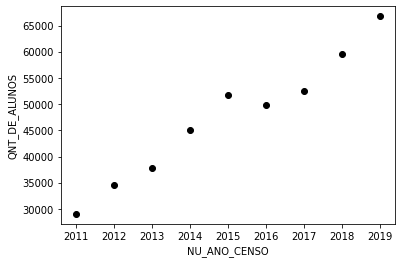

In [35]:
X = df_alunos_anos["NU_ANO_CENSO"].values
x = X.reshape(-1, 1)
y = df_alunos_anos['QNT_DE_ALUNOS'].values
plt.scatter(X, y, c = "black")
plt.xlabel("NU_ANO_CENSO")
plt.ylabel("QNT_DE_ALUNOS")
# Gráficos para regressões polinomiais devem formar um tipo de "curva", muito provavelmente esses dados não irão servir

In [58]:
# Importando as funções para a regressão polimonial com sklearn para processar nossos dados
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pre_process = PolynomialFeatures(degree=2)
# Transformando nosso x para 1, x e xˆ2
X_poly = pre_process.fit_transform(x)
X_poly

array([[1.000000e+00, 2.011000e+03, 4.044121e+06],
       [1.000000e+00, 2.012000e+03, 4.048144e+06],
       [1.000000e+00, 2.013000e+03, 4.052169e+06],
       [1.000000e+00, 2.014000e+03, 4.056196e+06],
       [1.000000e+00, 2.015000e+03, 4.060225e+06],
       [1.000000e+00, 2.016000e+03, 4.064256e+06],
       [1.000000e+00, 2.017000e+03, 4.068289e+06],
       [1.000000e+00, 2.018000e+03, 4.072324e+06],
       [1.000000e+00, 2.019000e+03, 4.076361e+06]])

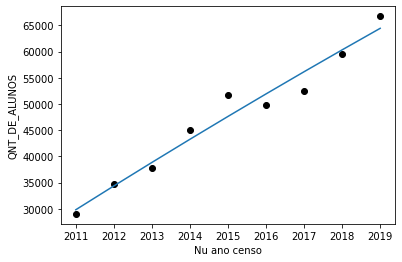

In [39]:
pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)
plt.scatter(x, y, c = "black")
plt.xlabel("Nu ano censo")
plt.ylabel("QNT_DE_ALUNOS")
plt.plot(X, y_pred)
#Os dados não servem para ser usados em uma regressão polinomial

In [48]:
theta0 = pr_model.intercept_
_ = pr_model.coef_
theta0

array([-1.34928822e+08])